In [2]:
import pandas as pd
import numpy as np

In [111]:
history_log_df = pd.read_csv("output/int_27_trace/int_27_trace_history.log")
# history_log_df.head(10)

In [72]:
history_log_df.head(10)

,Key,PC,Next_PC,Pred_Cycle,Fetch_Cycle,Execute_Cycle,Pred_Dir,Taken,Predictor_Used,Src_Regs,Dst_Reg,Mem_VA,Inst_Class,GHIST,Load_Dependence
519837264,2147493468,0,19630276,19630276,19630288,0,2,0,[],254,0,3,36170084296688136,255,0
519834896,281474722492888,281474722492892,0,0,19630275,0,-1,10,[14],0,281462530971808,1,0,255,1
519834880,281474722492884,281474722492888,0,0,19630275,0,-1,10,[17],16,281462529961232,1,0,255,1
519836512,281474722492804,0,19630272,19630272,19630292,0,2,0,[],254,0,3,9241457079003119876,255,0
519836368,281474722492992,0,19630271,19630271,19630283,0,2,0,[],254,0,3,13844100576356335746,255,0
519836288,281474722492880,0,19630269,19630270,19630289,1,2,0,[],254,0,3,16145422325032943681,255,0
519835952,281474722492932,0,19630267,19630267,19630296,0,2,0,[],254,0,3,17871413636540399632,255,0
519835664,281474722492804,0,19630266,19630266,19630286,0,2,0,[],254,0,3,18302911464417263620,255,0
519835520,281474722492992,0,19630265,19630265,19630277,0,2,0,[],254,0,3,18374827769063407618,255,0
519835440,281474722492880,0,19630263,19630264,19630283,1,2,0,[],254,0,3,18410785921386479617,255,0


In [77]:
history_log_df[
    # (history_log_df['Next_PC'] != 0)  
    (history_log_df['Inst_Class'] == 3)  
    # & (~history_log_df['Src_Regs'].astype(str).isin(['[]', '[64]']))
    # & (history_log_df['Key'] == 519837264)
    # & (history_log_df['Dst_Reg'] == 256)
    # & (history_log_df['CyclWP'] > 0)
    & (history_log_df['Taken'] == 2)
    & (history_log_df['executed'] == 1)
].head(20)

,Key,PC,Next_PC,Pred_Cycle,Fetch_Cycle,Execute_Cycle,Pred_Dir,Taken,Predictor_Used,Src_Regs,Dst_Reg,Mem_VA,Inst_Class,GHIST,Load_Dependence,executed


In [112]:
executed_branches = history_log_df[(history_log_df['Inst_Class'] == 3)
                                      & (history_log_df['executed'] == 1)].copy()
executed_branches['Mispredicted'] = np.where((executed_branches['Taken'] == executed_branches['Pred_Dir']), 0, 1)
executed_branches['CyclWP'] = np.maximum(executed_branches['Fetch_Cycle'], executed_branches['Execute_Cycle']) - executed_branches['Pred_Cycle']
executed_branches['CyclWP'] = np.where((executed_branches['Mispredicted'] == 1),executed_branches['CyclWP'],0 )
# history_log_branches['CyclWP'] = np.maximum(history_log_df['Fetch_Cycle'], history_log_df['Execute_Cycle']) - history_log_df['Pred_Cycle']

In [106]:
executed_branches.head(10)

,Key,PC,Next_PC,Pred_Cycle,Fetch_Cycle,Execute_Cycle,Pred_Dir,Taken,Predictor_Used,Src_Regs,Dst_Reg,Mem_VA,Inst_Class,GHIST,Load_Dependence,executed,Mispredicted,CyclWP
21,519834672,281474722492992,281474722492996,19630236,19630236,19630250,0,0,0,[64],255,0,3,18445620381449455616,0,1,0,0
22,519834608,281474722492804,281474722492980,19630235,19630236,19630255,1,1,0,[17],255,0,3,18446182227579503616,1,1,0,0
24,519834384,281474722492880,281474722492972,19630213,19630214,19630233,0,1,0,[17],255,0,3,18446603612177039616,0,1,1,20
28,519834160,281474722492960,281474722492964,19630192,19630192,19630212,1,0,0,[17],255,0,3,18446673842943295616,1,1,1,20
29,519834000,281474722492912,281474722492916,19630191,19630191,19630213,0,0,0,[64],255,0,3,18446726516017987616,0,1,0,0
40,519833808,281474722492804,281474722492808,19630169,19630169,19630190,1,0,0,[17],255,0,3,18446735294863769616,2,1,1,21
41,519833664,281474722492992,281474722492996,19630168,19630168,19630182,0,0,0,[64],255,0,3,18446739684286660616,0,1,0,0
42,519833600,281474722492804,281474722492980,19630167,19630168,19630187,1,1,2,[17],255,0,3,18446741878998106116,2,1,0,0
43,519833456,281474722492992,281474722492996,19630166,19630166,19630178,0,0,0,[64],255,0,3,9223370939499053058,0,1,0,0
44,519833104,281474722492960,281474722492820,19630163,19630164,19630183,1,1,0,[17],255,0,3,2305842734874763264,1,1,0,0


<Axes: >

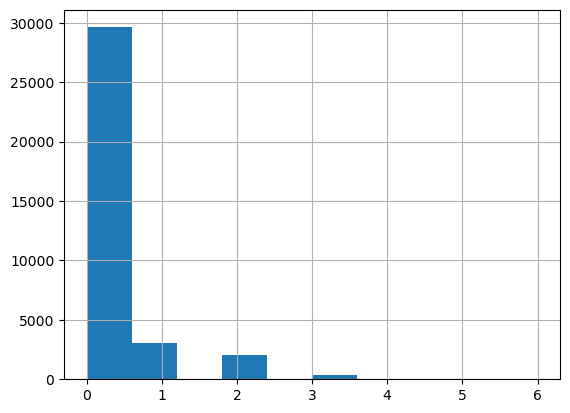

In [113]:
executed_branches[
    (executed_branches['Mispredicted'] == 1)   
    # & (~executed_branches['Src_Regs'].astype(str).isin(['[]', '[64]']))
    ]['Load_Dependence'].hist()

In [123]:
CyclWP_summary = executed_branches[
    (executed_branches['Mispredicted'] == 1)   
    # & (~executed_branches['Src_Regs'].astype(str).isin(['[]', '[64]']))
    ].groupby('Load_Dependence').agg({'CyclWP': ['count', 'sum']})
CyclWP_summary.columns = ['Number of misses','CyclWP'] 
CyclWP_summary['CyclWP per miss'] = CyclWP_summary['CyclWP']/CyclWP_summary['Number of misses']
CyclWP_summary

,Number of misses,CyclWP,CyclWP per miss
Load_Dependence,,,
0,29621,1005375,33.941292
1,3065,69397,22.641762
2,2036,70326,34.541257
3,327,7152,21.871560
4,6,98,16.333333
5,2,36,18.000000
6,1,16,16.000000


In [122]:
CyclWP_summary['Number of misses'].sum()

np.int64(1891314)

In [125]:
executed_branches['Load Dependence alter'] = np.where((executed_branches['Src_Regs'].astype(str).isin(['[]', '[64]'])),-1,
             executed_branches['Load_Dependence'])
CyclWP_summary_alter = executed_branches[
    (executed_branches['Mispredicted'] == 1)   
    # & (~executed_branches['Src_Regs'].astype(str).isin(['[]', '[64]']))
    ].groupby('Load Dependence alter').agg({'CyclWP': ['count', 'sum']})
CyclWP_summary_alter.columns = ['Number of misses','CyclWP'] 
CyclWP_summary_alter['CyclWP per miss'] = CyclWP_summary['CyclWP']/CyclWP_summary['Number of misses']
CyclWP_summary_alter

,Number of misses,CyclWP,CyclWP per miss
Load Dependence alter,,,
-1,26585,912238,NaN
0,3036,93137,33.941292
1,3065,69397,22.641762
2,2036,70326,34.541257
3,327,7152,21.871560
4,6,98,16.333333
5,2,36,18.000000
6,1,16,16.000000


In [ ]:
Load_Dependence,Number of misses,CyclWP,CyclWP per miss
-1,289708,240162,0.83
0,1601606,912238,0.57

In [117]:
289708+1601606

1891314

<Axes: xlabel='Load_Dependence', ylabel='CyclWP per miss'>

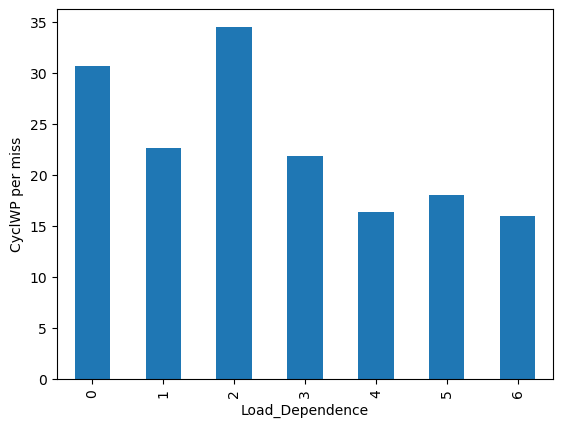

In [115]:
CyclWP_summary['CyclWP per miss'].plot(kind='bar',ylabel='CyclWP per miss')

In [ ]:
# l = []
# GHR = ""
# GHR_length = 8
# history_log_joined_df['GHR'] = 0
# # print("HI")
# for index,row in history_log_joined_df.iterrows():
#     if index > 200:
#         break
#     if(row['instClass'] == 'condBranch'):
#         GHR += str(row['taken'])
#         # print(GHR,"jdfk")
#         history_log_joined_df.iloc[index,-1] = GHR[-1-GHR_length:-1]
#         # for i in range(index-1,-1,-1):
#         #     l.append(history_log_df.iloc[i,:])
#             # print(history_log_df.iloc[i,:])
# pd.DataFrame(l).head()

C:\Users\vgr48\AppData\Local\Temp\ipykernel_94636\1865889121.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  history_log_joined_df.iloc[index,-1] = GHR[-1-GHR_length:-1]


""


In [1]:
import os
import pandas as pd

def load_trace_logs(output_folder):
    data = []
    
    for folder in os.listdir(output_folder):
        folder_path = os.path.join(output_folder, folder)
        if os.path.isdir(folder_path):
            log_file = os.path.join(folder_path, f"{folder}_CyclWP_summary.log")
            if os.path.exists(log_file):
                df = pd.read_csv(log_file)
                df["folder"] = folder  # Add folder name as a column
                data.append(df)
    
    return pd.concat(data, ignore_index=True) if data else pd.DataFrame()

# Usage
output_folder = "output"  # Change this to the actual path if needed
logs_df = load_trace_logs(output_folder)

# Print dataframe info to verify
print("Loaded logs dataframe:")
print(logs_df.info())

Loaded logs dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Load_Dependence   311 non-null    int64  
 1   Number of misses  311 non-null    int64  
 2   CyclWP            311 non-null    int64  
 3   CyclWP per miss   311 non-null    float64
 4   folder            311 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 12.3+ KB
None


In [3]:
logs_df.to_csv('CyclWP_summary.log.csv', index=False)

In [67]:
logs_df = pd.read_csv("CyclWP_summary.log.csv")

In [68]:
logs_df.head(10)   

,Load_Dependence,Number of misses,CyclWP,CyclWP per miss,folder
0,-1,96811,3032354,31.32,fp_0_trace
1,-1,118081,2285557,19.36,fp_10_trace
2,0,70,1184,16.91,fp_10_trace
3,1,1,15,15.00,fp_10_trace
4,2,62,1694,27.32,fp_10_trace
5,-1,46463,866592,18.65,fp_11_trace
6,0,36,1533,42.58,fp_11_trace
7,1,10,274,27.40,fp_11_trace
8,2,1,381,381.00,fp_11_trace
9,-1,48724,3015681,61.89,fp_12_trace


In [74]:
# Club -1 and 0 as 0 Load Dependence, rest as "any load dependence"
logs_df["Load_Dependence_grouped"] = logs_df["Load_Dependence"].apply(lambda x: "Not load-dependent" if x in [-1, 0] else "load-dependent")

# Group by folder and Load_Dependence, summing up the respective values
logs_df_grouped = logs_df.groupby(["folder", "Load_Dependence_grouped"]).agg({
    "Number of misses": "sum",
    "CyclWP": "sum"
}).reset_index()

# Calculate new CyclWP per miss
logs_df_grouped["CyclWP per miss"] = logs_df_grouped["CyclWP"] / logs_df_grouped["Number of misses"]
# Modify folder column to remove suffix _trace
logs_df_grouped["folder"] = logs_df_grouped["folder"].str.replace("_trace", "", regex=False)
# Rename column folder to "trace"
logs_df_grouped.rename(columns={"folder": "trace"}, inplace=True)


In [75]:
logs_df_grouped[logs_df_grouped["Load_Dependence_grouped"] == 'load-dependent'].head(10)

,trace,Load_Dependence_grouped,Number of misses,CyclWP,CyclWP per miss
2,fp_10,load-dependent,63,1709,27.126984
4,fp_11,load-dependent,11,655,59.545455
6,fp_12,load-dependent,600,11473,19.121667
8,fp_13,load-dependent,5606,192441,34.327685
10,fp_1,load-dependent,13,2432,187.076923
12,fp_2,load-dependent,6992,238042,34.044908
14,fp_3,load-dependent,6962,643446,92.422580
16,fp_4,load-dependent,397,26042,65.596977
18,fp_5,load-dependent,14,218,15.571429
20,fp_6,load-dependent,56,2721,48.589286


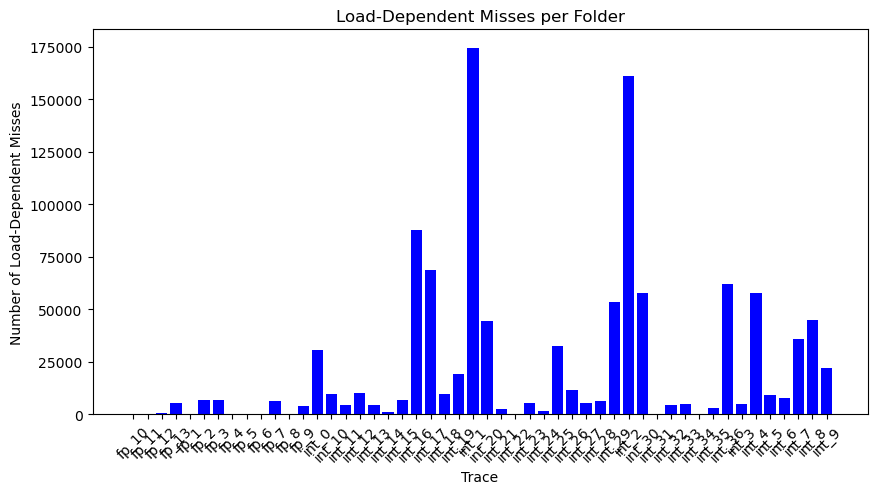

In [86]:
# Plot number of load-dependent misses
import matplotlib.pyplot as plt
load_dependent_misses = logs_df_grouped[logs_df_grouped["Load_Dependence_grouped"] == "load-dependent"]
plt.figure(figsize=(10, 5))
plt.bar(load_dependent_misses["trace"], load_dependent_misses["Number of misses"], color='blue')
plt.xlabel("Trace")
plt.ylabel("Number of Load-Dependent Misses")
plt.title("Load-Dependent Misses per Folder")
plt.xticks(rotation=45)
plt.show()


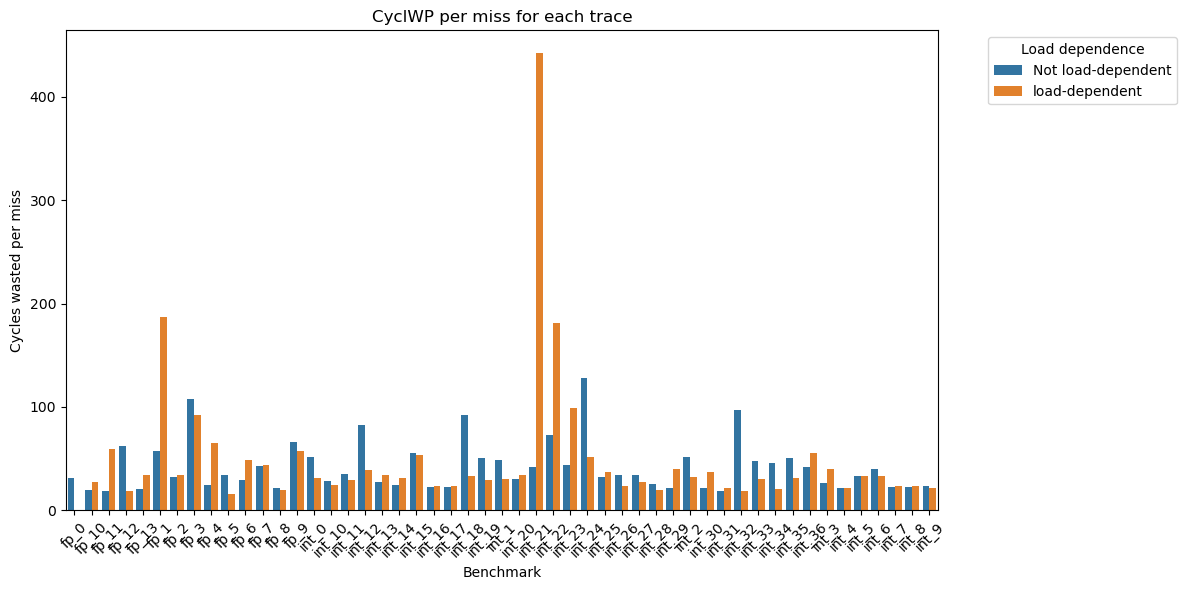

In [88]:
# Plot grouped bar chart
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
# sns.barplot(data=logs_df, x="Load_Dependence", y="CyclWP per miss", hue="folder")
sns.barplot(data=logs_df_grouped, x="trace", y="CyclWP per miss", hue="Load_Dependence_grouped")
plt.xlabel("Benchmark")
plt.ylabel("Cycles wasted per miss")
plt.title("CyclWP per miss for each trace")
# plt.legend(title="Folder", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(title="Load dependence", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

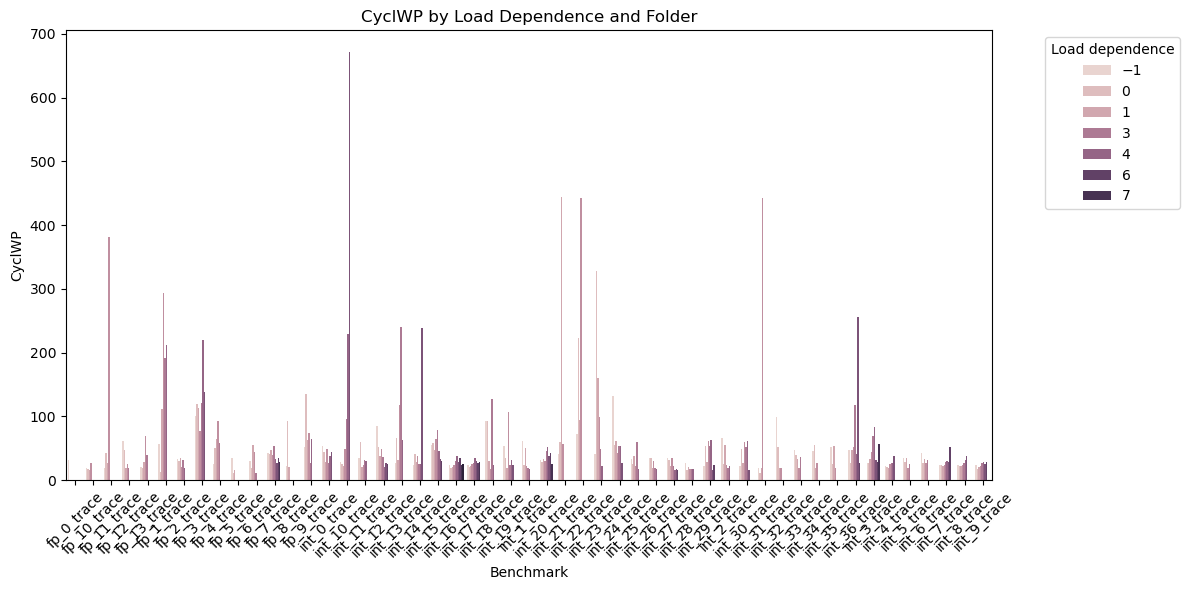

In [10]:
# Plot grouped bar chart
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
# sns.barplot(data=logs_df, x="Load_Dependence", y="CyclWP per miss", hue="folder")
sns.barplot(data=logs_df, x="folder", y="CyclWP per miss", hue="Load_Dependence")
plt.xlabel("Benchmark")
plt.ylabel("CyclWP")
plt.title("CyclWP by Load Dependence and Folder")
# plt.legend(title="Folder", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(title="Load dependence", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\vgr48\AppData\Local\Temp\ipykernel_26084\2269142855.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


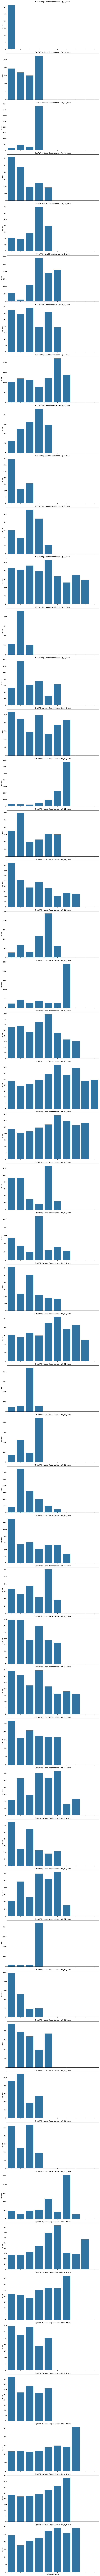

In [11]:
# Plot each folder in its own subplot
folders = logs_df["folder"].unique()
n_folders = len(folders)
fig, axes = plt.subplots(nrows=n_folders, figsize=(10, 5 * n_folders), sharex=True)

if n_folders == 1:
    axes = [axes]  # Ensure axes is iterable when only one subplot

for ax, folder in zip(axes, folders):
    # sns.barplot(data=logs_df[logs_df["folder"] == folder], x="Load_Dependence", y="CyclWP", ax=ax)
    sns.barplot(data=logs_df[logs_df["folder"] == folder], x="Load_Dependence", y="CyclWP per miss", ax=ax)
    ax.set_title(f"CyclWP by Load Dependence - {folder}")
    ax.set_xlabel("Load Dependence")
    ax.set_ylabel("CyclWP")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [107]:
import os
import re

def parse_result_from_logs(root_dir, metric):
    metric_data = []
    metric_pattern = re.compile(rf'{metric}\s*=\s*([\d\.]+)')
    
    for subdir, _, files in os.walk(root_dir):
        # Extract LDB_enabled and U value from folder structure
        path_parts = subdir.split(os.sep)
        ldb_enabled = "Unknown"
        u_value = "Unknown"
        
        for part in path_parts:
            if part.startswith("LDB_Enabled") or part.startswith("LDB_Disabled"):
                ldb_enabled, u_value = part.split("_U_")
                
        for file in files:
            if file.endswith("_result.log"):
                file_path = os.path.join(subdir, file)
                with open(file_path, 'r') as f:
                    for line in f:
                        match = metric_pattern.search(line)
                        if match:
                            metric_value = float(match.group(1))
                            metric_data.append((file[:-17], metric_value, ldb_enabled, u_value))
                            break  # Stop searching after finding the first metric value
    
    return metric_data




In [ ]:
root_directory = "output"  # Change this to your logs directory
ipc_results = parse_result_from_logs(root_directory, "IPC")
CycWP_results = parse_result_from_logs(root_directory, "CycWP")

In [ ]:
print("File Path | IPC | LDB_Enabled | U Value")
print("-" * 50)
for file, ipc, ldb, u in ipc_results:
    print(f"{file} | {ipc} | {ldb} | {u}")

In [55]:
print("File Path | CycWp | LDB_Enabled | U Value")
print("-" * 50)
for file, ipc, ldb, u in CycWP_results:
    print(f"{file} | {ipc} | {ldb} | {u}")

File Path | CycWp | LDB_Enabled | U Value
--------------------------------------------------
fp_0 | 3032354.0 | LDB_Disabled | 0
fp_10 | 2288450.0 | LDB_Disabled | 0
fp_11 | 868780.0 | LDB_Disabled | 0
fp_12 | 3027437.0 | LDB_Disabled | 0
fp_13 | 10769347.0 | LDB_Disabled | 0
fp_1 | 26713119.0 | LDB_Disabled | 0
fp_2 | 2914883.0 | LDB_Disabled | 0
fp_3 | 6820697.0 | LDB_Disabled | 0
fp_4 | 1848536.0 | LDB_Disabled | 0
fp_5 | 1287156.0 | LDB_Disabled | 0
fp_6 | 1989332.0 | LDB_Disabled | 0
fp_7 | 1919513.0 | LDB_Disabled | 0
fp_8 | 7445178.0 | LDB_Disabled | 0
fp_9 | 11930862.0 | LDB_Disabled | 0
int_0 | 10018418.0 | LDB_Disabled | 0
int_10 | 880097.0 | LDB_Disabled | 0
int_11 | 9289544.0 | LDB_Disabled | 0
int_12 | 3370304.0 | LDB_Disabled | 0
int_13 | 1076660.0 | LDB_Disabled | 0
int_14 | 409462.0 | LDB_Disabled | 0
int_15 | 1849541.0 | LDB_Disabled | 0
int_16 | 7292695.0 | LDB_Disabled | 0
int_17 | 5879469.0 | LDB_Disabled | 0
int_18 | 3022925.0 | LDB_Disabled | 0
int_19 | 1497306.0 

In [57]:
# convert CycWP_results to dataframe
CycWP_df = pd.DataFrame(CycWP_results, columns=["File Path", "CycWP", "LDB_Enabled", "U Value"])
# add new column concatenating LDB_Enabled and U Value and delete the two columns
CycWP_df["LDB_Enabled_U"] = CycWP_df["LDB_Enabled"] + "_" + CycWP_df["U Value"]
CycWP_df.head(10)

,File Path,CycWP,LDB_Enabled,U Value,LDB_Enabled_U
0,fp_0,3032354.0,LDB_Disabled,0,LDB_Disabled_0
1,fp_10,2288450.0,LDB_Disabled,0,LDB_Disabled_0
2,fp_11,868780.0,LDB_Disabled,0,LDB_Disabled_0
3,fp_12,3027437.0,LDB_Disabled,0,LDB_Disabled_0
4,fp_13,10769347.0,LDB_Disabled,0,LDB_Disabled_0
5,fp_1,26713119.0,LDB_Disabled,0,LDB_Disabled_0
6,fp_2,2914883.0,LDB_Disabled,0,LDB_Disabled_0
7,fp_3,6820697.0,LDB_Disabled,0,LDB_Disabled_0
8,fp_4,1848536.0,LDB_Disabled,0,LDB_Disabled_0
9,fp_5,1287156.0,LDB_Disabled,0,LDB_Disabled_0


In [98]:
# Pivot the dataframe to have LDB_Enabled_U as columns and File Path as index, and CycWP as values
CycWP_pivot = CycWP_df.pivot(index="File Path", columns="LDB_Enabled_U", values="CycWP")
# create new column as percent difference between LDB_Enabled_U and LDB_Disabled_U
CycWP_pivot["Improvemnt from Ldb_1"] = (CycWP_pivot["LDB_Disabled_0"] - CycWP_pivot["LDB_Enabled_1"]) 
CycWP_pivot["Improvemnt from Ldb_2"] = (CycWP_pivot["LDB_Disabled_0"] - CycWP_pivot["LDB_Enabled_2"]) 
CycWP_pivot["Improvemnt from Ldb_3"] = (CycWP_pivot["LDB_Disabled_0"] - CycWP_pivot["LDB_Enabled_3"]) 


CycWP_pivot.reset_index(inplace=True)

CycWP_pivot.rename(columns={"File Path": "trace"}, inplace=True)
# Join logs_df_grouped to CycWP_pivot on trace to get the CyclWp from logs_df_grouped and add it to CycWP_pivot
CycWP_pivot = pd.merge(CycWP_pivot, logs_df_grouped[logs_df_grouped["Load_Dependence_grouped"] == 'load-dependent'], on="trace", how="left")
Removed = ['LDB_Enabled_1', 'LDB_Enabled_2', 'LDB_Enabled_3','Load_Dependence_grouped', 'Number of misses', 'CyclWP per miss']
CycWP_pivot.drop(columns=Removed, inplace=True)
# rename the columns to have a common prefix  
# CycWP_pivot.columns = [f"CycWP_{col}" if col not in ["trace", "Load_Dependence_grouped"] else col for col in CycWP_pivot.columns]
# CycWP_pivot.drop(columns=["Load_Dependence_grouped"], inplace=True)
CycWP_pivot.head(10)

,trace,LDB_Disabled_0,Improvemnt from Ldb_1,Improvemnt from Ldb_2,Improvemnt from Ldb_3,CyclWP
0,fp_0,3032354.0,0.0,0.0,0.0,NaN
1,fp_1,26713119.0,0.0,0.0,0.0,2432.0
2,fp_10,2288450.0,0.0,0.0,0.0,1709.0
3,fp_11,868780.0,0.0,0.0,0.0,655.0
4,fp_12,3027437.0,0.0,0.0,0.0,11473.0
5,fp_13,10769347.0,-18768.0,-18768.0,-18768.0,192441.0
6,fp_2,2914883.0,104705.0,104705.0,104705.0,238042.0
7,fp_3,6820697.0,-200142.0,-200142.0,-200142.0,643446.0
8,fp_4,1848536.0,0.0,0.0,0.0,26042.0
9,fp_5,1287156.0,0.0,0.0,0.0,218.0


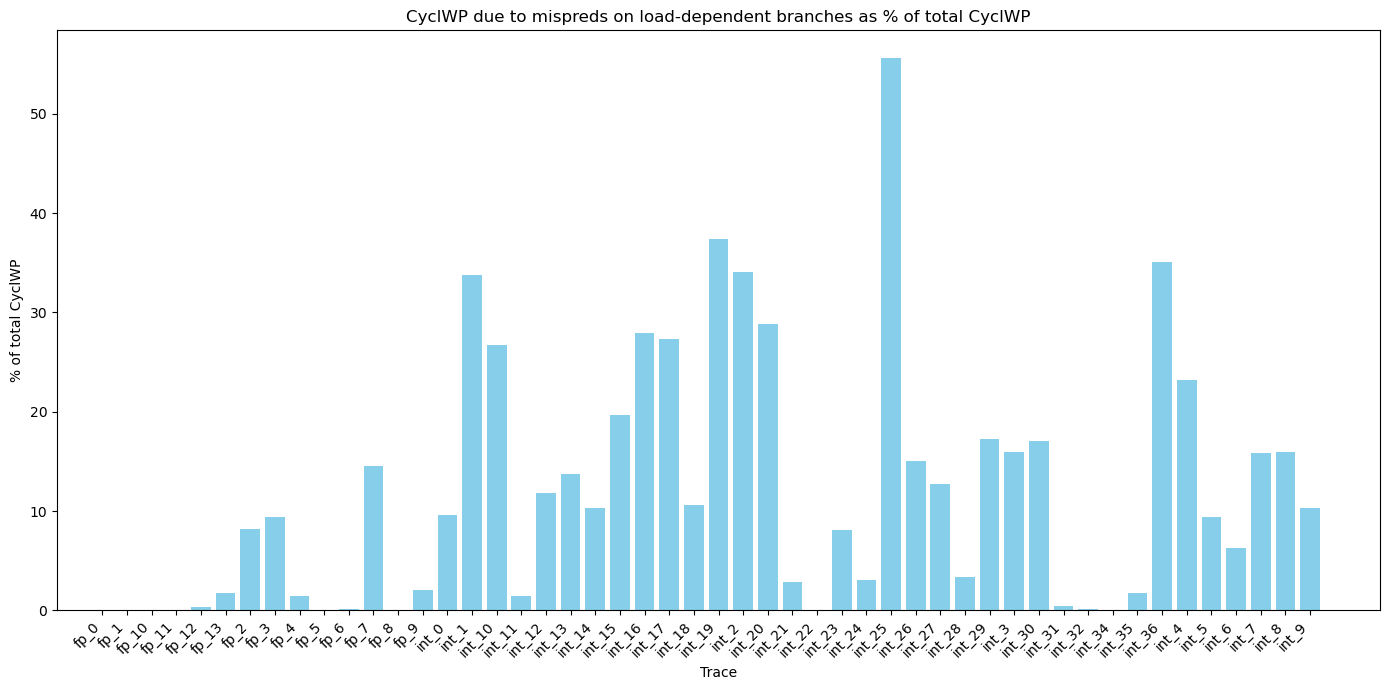

In [108]:
import matplotlib.pyplot as plt

# Calculate the percentage
CycWP_pivot["CyclWP Percentage"] = (CycWP_pivot["CyclWP"] / CycWP_pivot["LDB_Disabled_0"]) * 100

# Plot the bar chart
plt.figure(figsize=(14, 7))
plt.bar(CycWP_pivot["trace"], CycWP_pivot["CyclWP Percentage"], color='skyblue')

# Add labels and title
plt.xlabel("Trace")
plt.ylabel("% of total CyclWP")
plt.title("CyclWP due to mispreds on load-dependent branches as % of total CyclWP")
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()

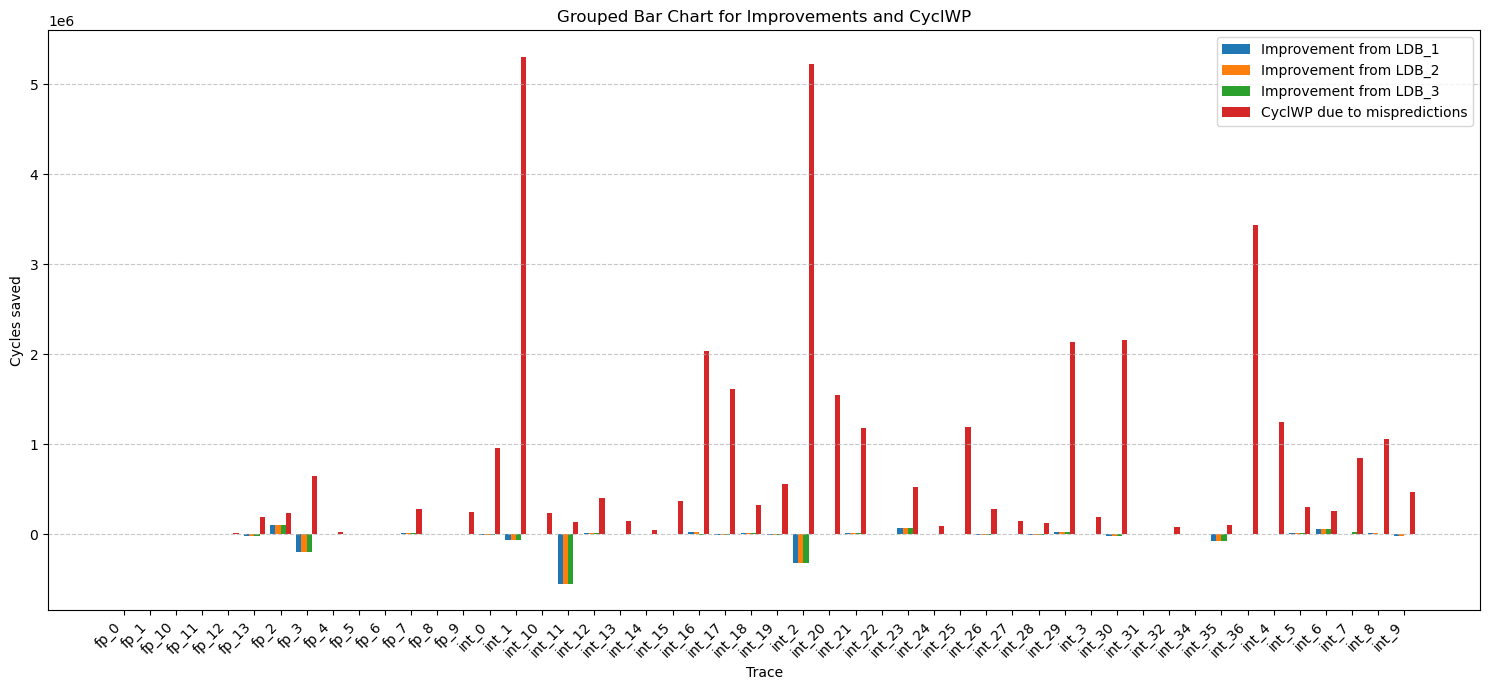

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare data
labels = CycWP_pivot["trace"]
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 7))

# Plot each improvement and CyclWP as separate bars
ax.bar(x - 1.5 * width, CycWP_pivot["Improvemnt from Ldb_1"], width, label="Improvement from LDB_1")
ax.bar(x - 0.5 * width, CycWP_pivot["Improvemnt from Ldb_2"], width, label="Improvement from LDB_2")
ax.bar(x + 0.5 * width, CycWP_pivot["Improvemnt from Ldb_3"], width, label="Improvement from LDB_3")
ax.bar(x + 1.5 * width, CycWP_pivot["CyclWP"], width, label="CyclWP due to mispredictions")

# Add labels, title, and legend
ax.set_xlabel("Trace")
ax.set_ylabel("Cycles saved")
ax.set_title("Grouped Bar Chart for Improvements and CyclWP")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend()

# Add grid for better readability
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


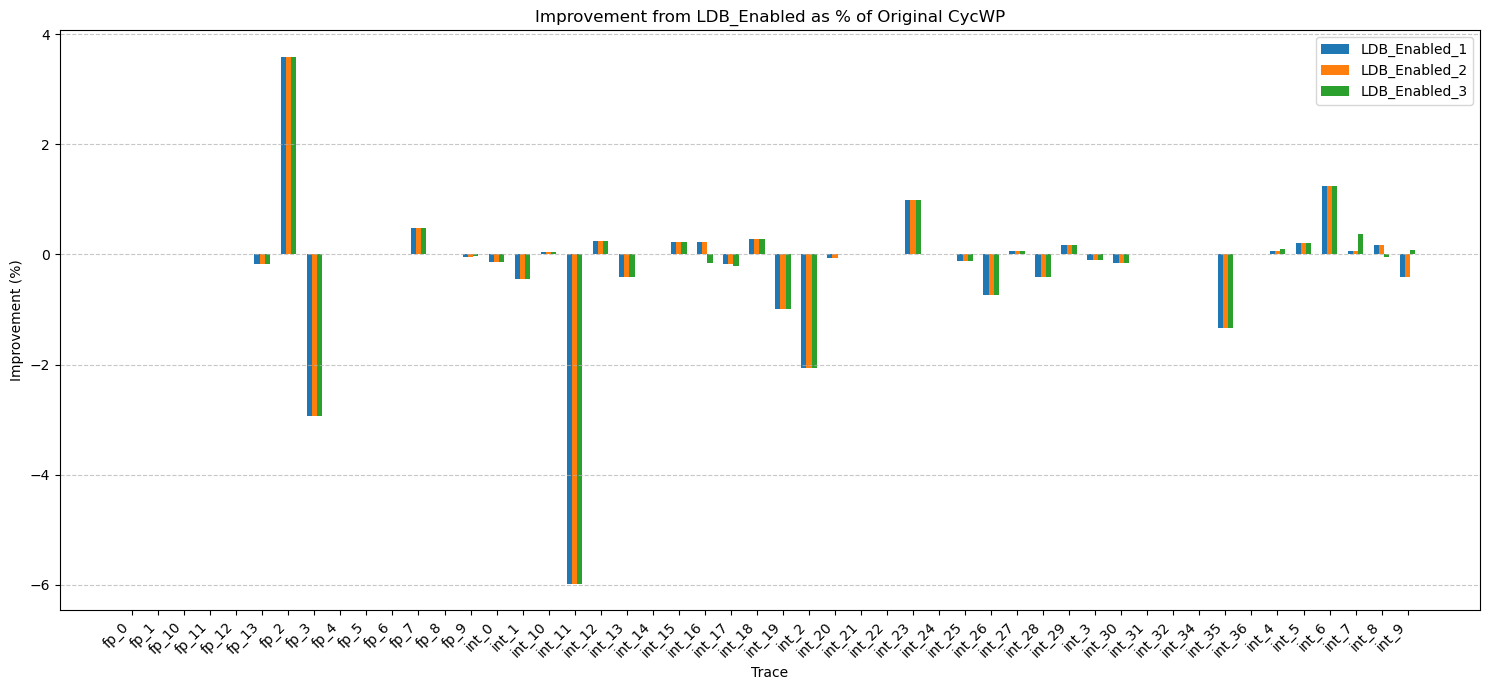

In [92]:
import numpy as np

import matplotlib.pyplot as plt

# Calculate percentage improvement for each LDB_Enabled
CycWP_pivot["Improvement from LDB_1 (%)"] = (CycWP_pivot["Improvemnt from Ldb_1"] / CycWP_pivot["LDB_Disabled_0"]) * 100
CycWP_pivot["Improvement from LDB_2 (%)"] = (CycWP_pivot["Improvemnt from Ldb_2"] / CycWP_pivot["LDB_Disabled_0"]) * 100
CycWP_pivot["Improvement from LDB_3 (%)"] = (CycWP_pivot["Improvemnt from Ldb_3"] / CycWP_pivot["LDB_Disabled_0"]) * 100

# Prepare data for grouped bar chart
labels = CycWP_pivot["trace"]
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 7))

# Plot each improvement as a separate group
ax.bar(x - width, CycWP_pivot["Improvement from LDB_1 (%)"], width, label="LDB_Enabled_1")
ax.bar(x, CycWP_pivot["Improvement from LDB_2 (%)"], width, label="LDB_Enabled_2")
ax.bar(x + width, CycWP_pivot["Improvement from LDB_3 (%)"], width, label="LDB_Enabled_3")

# Add labels, title, and legend
ax.set_xlabel("Trace")
ax.set_ylabel("Improvement (%)")
ax.set_title("Improvement from LDB_Enabled as % of Original CycWP")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend()

# Add grid for better readability
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

In [85]:
# Filter from the CycWP_pivot dataframe to get the rows where the improvement is greater than 0
improvement_df = CycWP_pivot[(CycWP_pivot["Improvemnt from Ldb_1"] > 0) | (CycWP_pivot["Improvemnt from Ldb_2"] > 0) | (CycWP_pivot["Improvemnt from Ldb_3"] > 0)]
improvement_df.head(20)

,trace,LDB_Disabled_0,Improvemnt from Ldb_1,Improvemnt from Ldb_2,Improvemnt from Ldb_3,CyclWP
6,fp_2,2914883.0,104705.0,104705.0,104705.0,238042.0
11,fp_7,1919513.0,9107.0,9107.0,9107.0,278284.0
16,int_10,880097.0,415.0,415.0,415.0,235267.0
18,int_12,3370304.0,8427.0,8427.0,8427.0,399102.0
21,int_15,1849541.0,4134.0,4134.0,4134.0,364127.0
22,int_16,7292695.0,17156.0,17156.0,-11396.0,2037582.0
24,int_18,3022925.0,8618.0,8618.0,8618.0,320955.0
27,int_20,5374383.0,-3188.0,-3188.0,351.0,1547782.0
28,int_21,41566842.0,7266.0,7266.0,7266.0,1184329.0
29,int_22,15759085.0,475.0,475.0,475.0,724.0


C:\Users\vgr48\AppData\Local\Temp\ipykernel_23132\254237311.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="LDB and U Value", bbox_to_anchor=(1.05, 1), loc='upper left')


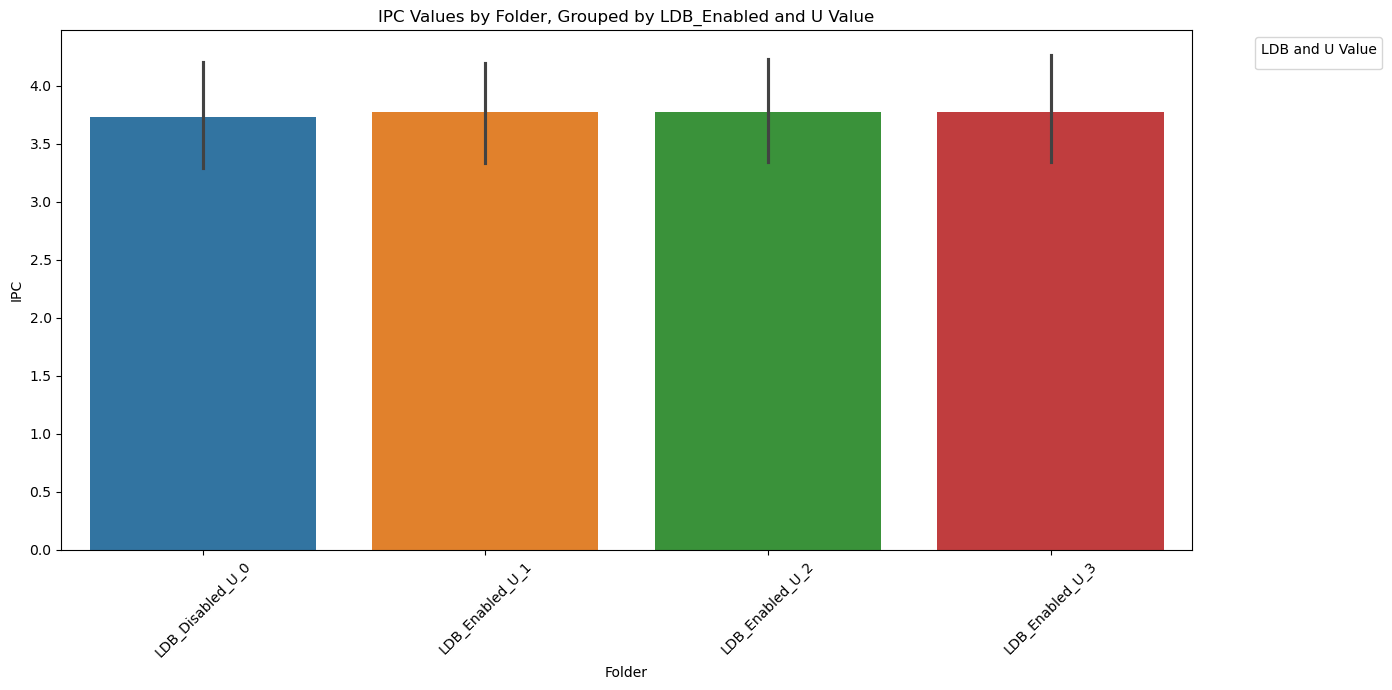

In [4]:
# Ensure U Value is treated as a categorical variable for proper grouping
ipc_df["U Value"] = ipc_df["U Value"].astype(str)

# Combine LDB_Enabled and U Value for grouping
ipc_df["LDB_U_Group"] = ipc_df["LDB_Enabled"] + "_U_" + ipc_df["U Value"]

# Plot the bar chart
plt.figure(figsize=(14, 7))
sns.barplot(data=ipc_df, x="Folder", y="IPC", hue="LDB_U_Group", order=sorted(ipc_df["Folder"].unique()))
plt.xlabel("Folder")
plt.ylabel("IPC")
plt.title("IPC Values by Folder, Grouped by LDB_Enabled and U Value")
plt.xticks(rotation=45)
plt.legend(title="LDB and U Value", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [7]:
import numpy as np
def plot_ipc(ipc_data):
    grouped_data = {}
    
    for folder, ipc, ldb, u in ipc_data:
        key = folder.split(os.sep)[-1]
        if key not in grouped_data:
            grouped_data[key] = {"LDB_Disabled": None, "LDB_Enabled_1": None, "LDB_Enabled_2": None, "LDB_Enabled_3": None}
        
        if ldb == "LDB_Disabled":
            grouped_data[key]["LDB_Disabled"] = ipc
        elif ldb == "LDB_Enabled" and u in {1, 2, 3}:
            grouped_data[key][f"LDB_Enabled_{u}"] = ipc
    
    labels = list(grouped_data.keys())
    x = np.arange(len(labels))
    width = 0.2  # Bar width
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    offsets = {
        "LDB_Disabled": -1.5 * width,
        "LDB_Enabled_1": -0.5 * width,
        "LDB_Enabled_2": 0.5 * width,
        "LDB_Enabled_3": 1.5 * width
    }
    
    for key, offset in offsets.items():
        values = [grouped_data[label].get(key, 0) for label in labels]
        ax.bar(x + offset, values, width, label=key)
    
    ax.set_xlabel("Folders")
    ax.set_ylabel("IPC Values")
    ax.set_title("IPC Values Grouped by LDB Status and U Value")
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.legend()
    
    plt.tight_layout()
    plt.show()


In [23]:
ipc_results_df = pd.DataFrame(ipc_results, columns=["trace", "IPC", "LDB_Enabled", "U Value"])
ipc_results_df.head(10)

,trace,IPC,LDB_Enabled,U Value
0,fp_0,4.4074,LDB_Disabled,0
1,fp_10,5.5614,LDB_Disabled,0
2,fp_11,5.1497,LDB_Disabled,0
3,fp_12,4.9204,LDB_Disabled,0
4,fp_13,2.6189,LDB_Disabled,0
5,fp_1,0.9863,LDB_Disabled,0
6,fp_2,4.6760,LDB_Disabled,0
7,fp_3,2.3411,LDB_Disabled,0
8,fp_4,4.1875,LDB_Disabled,0
9,fp_5,5.2838,LDB_Disabled,0


In [26]:
ipc_results_df[ipc_results_df["trace"] == "int_0"].head(10)

,trace,IPC,LDB_Enabled,U Value
14,int_0,2.7202,LDB_Disabled,0
64,int_0,2.7183,LDB_Enabled,1
113,int_0,2.7183,LDB_Enabled,2
162,int_0,2.7183,LDB_Enabled,3


In [34]:
ipc_results_df["Load depenent branhes optimization"] = np.where(ipc_results_df["LDB_Enabled"] == "LDB_Enabled", 
                                                             f'LDB_Enabled with u_incr = {ipc_results_df['U Value']}', "Not optimized")

In [36]:
ipc_results_df["Load Dependent Branch Optimization"] = ipc_results_df.apply(
        lambda row: f"LDB_Enabled with u_incr = {row['U Value']}" if row["LDB_Enabled"] == "LDB_Enabled" else "Not Optimized",
        axis=1
    )

In [43]:
ipc_results_df[ipc_results_df["trace"] == "int_0"].head(10)

,trace,IPC,LDB_Enabled,U Value,Load depenent branhes optimization,Load Dependent Branch Optimization
14,int_0,2.7202,LDB_Disabled,0,Not optimized,Not Optimized
64,int_0,2.7183,LDB_Enabled,1,LDB_Enabled with u_incr = 0 0\n1 0\n...,LDB_Enabled with u_incr = 1
113,int_0,2.7183,LDB_Enabled,2,LDB_Enabled with u_incr = 0 0\n1 0\n...,LDB_Enabled with u_incr = 2
162,int_0,2.7183,LDB_Enabled,3,LDB_Enabled with u_incr = 0 0\n1 0\n...,LDB_Enabled with u_incr = 3


In [ ]:
# Filter for integer traces
int_traces = ipc_results_df[ipc_results_df["trace"].str.startswith("int")]

# Plot for integer traces
plt.figure(figsize=(14, 7))
sns.barplot(data=int_traces, x="trace", y="IPC", hue="Load Dependent Branch Optimization")
plt.xlabel("Trace")
plt.ylabel("IPC")
plt.title("IPC Values for Integer Traces, Grouped by Load Dependent Branch Optimization")
plt.xticks(rotation=90)
plt.legend(title="Load Dependent Branch Optimization", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Filter for floating-point traces
fp_traces = ipc_results_df[ipc_results_df["trace"].str.startswith("fp")]

# Plot for floating-point traces
plt.figure(figsize=(14, 7))
sns.barplot(data=fp_traces, x="trace", y="IPC", hue="Load Dependent Branch Optimization")
plt.xlabel("Trace")
plt.ylabel("IPC")
plt.title("IPC Values for Floating-Point Traces, Grouped by Load Dependent Branch Optimization")
plt.xticks(rotation=90)
plt.legend(title="Load Dependent Branch Optimization", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Filter the data for "Not LDB" and "LDB Enabled" categories
not_ldb = ipc_results_df[ipc_results_df["LDB_Enabled"] == "LDB_Disabled"]
ldb_enabled = ipc_results_df[ipc_results_df["LDB_Enabled"] == "LDB_Enabled"]

#
ipc_comparison = pd.merge(not_ldb, ldb_enabled, on="trace", suffixes=("_not_ldb", "_ldb"))

# Calculate the IPC improvement in percentage
ipc_comparison["IPC Improvement (%)"] = ((ipc_comparison["IPC_ldb"] - ipc_comparison["IPC_not_ldb"]) / ipc_comparison["IPC_not_ldb"]) * 100

# Display the results
ipc_comparison[["trace", "IPC_not_ldb", "IPC_ldb", "IPC Improvement (%)"]]

In [51]:
# Filter the data for LDB_Disabled and LDB_Enabled
ldb_disabled = ipc_results_df[ipc_results_df["LDB_Enabled"] == "LDB_Disabled"]
ldb_enabled = ipc_results_df[ipc_results_df["LDB_Enabled"] == "LDB_Enabled"]

# Merge the datasets on the trace column
ipc_comparison = pd.merge(ldb_disabled, ldb_enabled, on="trace", suffixes=("_disabled", "_enabled"))

# Calculate IPC improvement for each U value
ipc_comparison["IPC Improvement (%)"] = ((ipc_comparison["IPC_enabled"] - ipc_comparison["IPC_disabled"]) / ipc_comparison["IPC_disabled"]) * 100

# Pivot the data to ensure one row per trace, including IPC values
ipc_pivot = ipc_comparison.pivot_table(
    index="trace",
    columns="U Value_enabled",
    values=["IPC_disabled", "IPC_enabled", "IPC Improvement (%)"],
    aggfunc="first"
).reset_index()

# Flatten the multi-level columns
ipc_pivot.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col for col in ipc_pivot.columns]

# Rename columns for clarity
ipc_pivot.rename(columns={
    "IPC_disabled_0": "IPC Disabled",
    "IPC_enabled_1": "IPC Enabled (U=1)",
    "IPC_enabled_2": "IPC Enabled (U=2)",
    "IPC_enabled_3": "IPC Enabled (U=3)",
    "IPC Improvement (%)_1": "IPC Improvement (U=1) (%)",
    "IPC Improvement (%)_2": "IPC Improvement (U=2) (%)",
    "IPC Improvement (%)_3": "IPC Improvement (U=3) (%)"
}, inplace=True)

# Display the results
ipc_pivot


,trace,IPC Improvement (U=1) (%),IPC Improvement (U=2) (%),IPC Improvement (U=3) (%),IPC_disabled_1,IPC_disabled_2,IPC_disabled_3,IPC Enabled (U=1),IPC Enabled (U=2),IPC Enabled (U=3)
0,fp_0,0.000000,0.000000,0.000000,4.4074,4.4074,4.4074,4.4074,4.4074,4.4074
1,fp_1,0.000000,0.000000,0.000000,0.9863,0.9863,0.9863,0.9863,0.9863,0.9863
2,fp_10,0.000000,0.000000,0.000000,5.5614,5.5614,5.5614,5.5614,5.5614,5.5614
3,fp_11,0.000000,0.000000,0.000000,5.1497,5.1497,5.1497,5.1497,5.1497,5.1497
4,fp_12,0.000000,0.000000,0.000000,4.9204,4.9204,4.9204,4.9204,4.9204,4.9204
5,fp_13,-0.133644,-0.133644,-0.133644,2.6189,2.6189,2.6189,2.6154,2.6154,2.6154
6,fp_2,1.633875,1.633875,1.633875,4.6760,4.6760,4.6760,4.7524,4.7524,4.7524
7,fp_3,-0.478408,-0.478408,-0.478408,2.3411,2.3411,2.3411,2.3299,2.3299,2.3299
8,fp_4,0.000000,0.000000,0.000000,4.1875,4.1875,4.1875,4.1875,4.1875,4.1875
9,fp_5,0.000000,0.000000,0.000000,5.2838,5.2838,5.2838,5.2838,5.2838,5.2838


In [44]:
# Filter the data for "Not LDB" and "LDB Enabled" categories
not_ldb = ipc_results_df[ipc_results_df["LDB_Enabled"] == "LDB_Disabled"]
ldb_enabled = ipc_results_df[ipc_results_df["LDB_Enabled"] == "LDB_Enabled"]

# Merge the two datasets on the trace column to compare IPC values
ipc_comparison = pd.merge(not_ldb, ldb_enabled, on="trace", suffixes=("_not_ldb", "_ldb"))

# Calculate the IPC improvement in percentage
ipc_comparison["IPC Improvement (%)"] = ((ipc_comparison["IPC_ldb"] - ipc_comparison["IPC_not_ldb"]) / ipc_comparison["IPC_not_ldb"]) * 100

# Display the results
ipc_comparison[["trace", "IPC_not_ldb", "IPC_ldb", "IPC Improvement (%)"]]

,trace,IPC_not_ldb,IPC_ldb,IPC Improvement (%)
0,fp_0,4.4074,4.4074,0.000000
1,fp_0,4.4074,4.4074,0.000000
2,fp_0,4.4074,4.4074,0.000000
3,fp_10,5.5614,5.5614,0.000000
4,fp_10,5.5614,5.5614,0.000000
...,...,...,...,...
142,int_8,2.4491,2.4508,0.069413
143,int_8,2.4491,2.4487,-0.016333
144,int_9,2.7849,2.7814,-0.125678
145,int_9,2.7849,2.7814,-0.125678


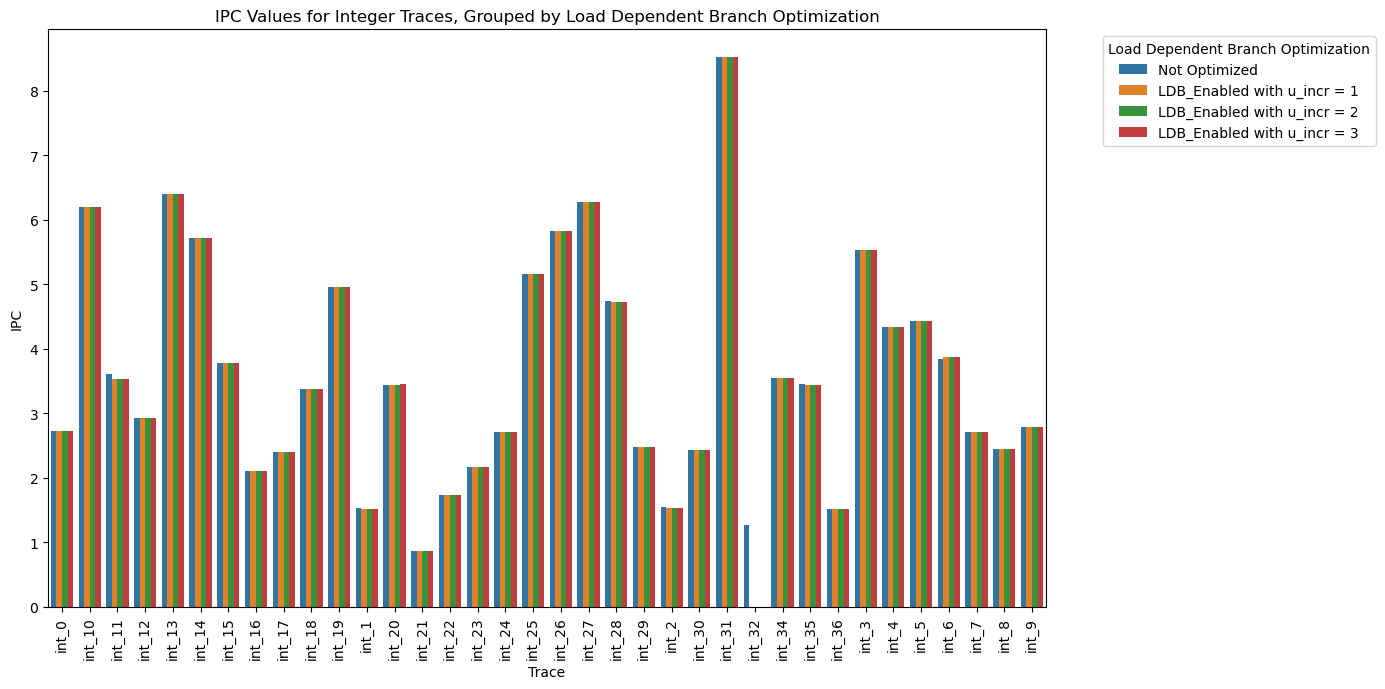

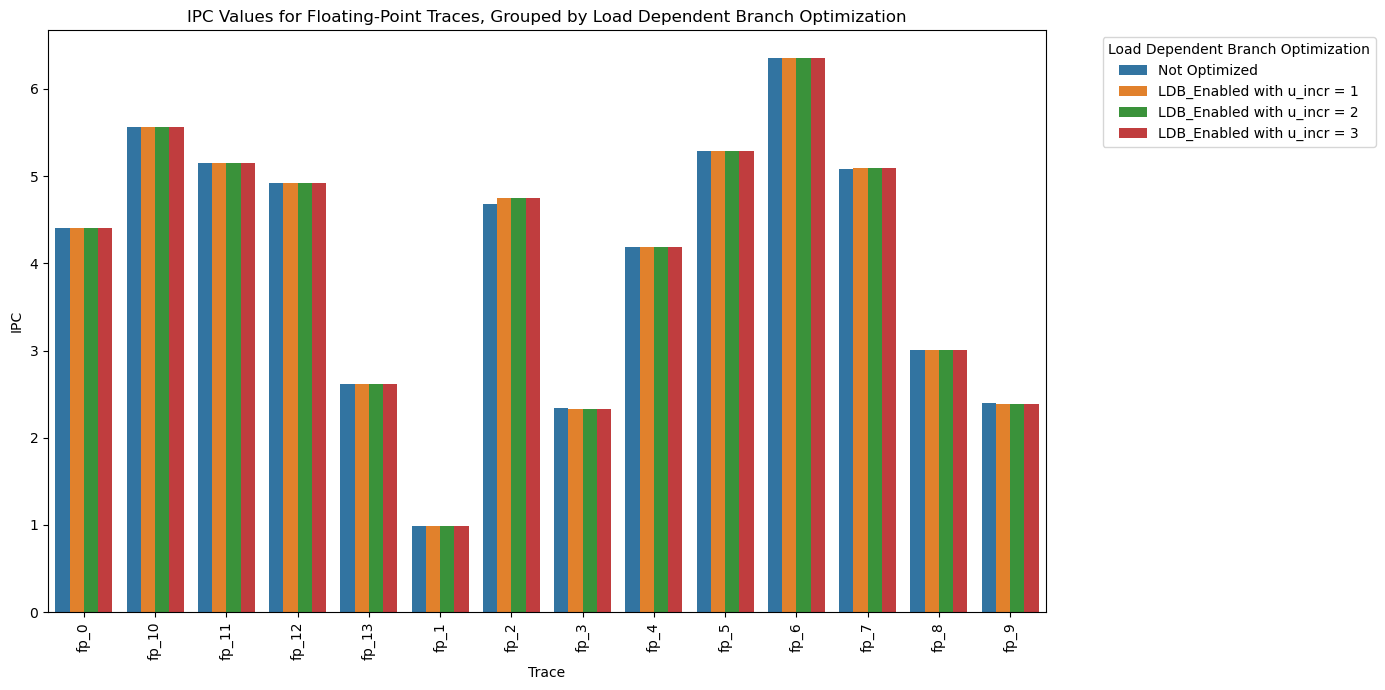

In [41]:
# Filter for integer traces
int_traces = ipc_results_df[ipc_results_df["trace"].str.startswith("int")]

# Plot for integer traces
plt.figure(figsize=(14, 7))
sns.barplot(data=int_traces, x="trace", y="IPC", hue="Load Dependent Branch Optimization")
plt.xlabel("Trace")
plt.ylabel("IPC")
plt.title("IPC Values for Integer Traces, Grouped by Load Dependent Branch Optimization")
plt.xticks(rotation=90)
plt.legend(title="Load Dependent Branch Optimization", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Filter for floating-point traces
fp_traces = ipc_results_df[ipc_results_df["trace"].str.startswith("fp")]

# Plot for floating-point traces
plt.figure(figsize=(14, 7))
sns.barplot(data=fp_traces, x="trace", y="IPC", hue="Load Dependent Branch Optimization")
plt.xlabel("Trace")
plt.ylabel("IPC")
plt.title("IPC Values for Floating-Point Traces, Grouped by Load Dependent Branch Optimization")
plt.xticks(rotation=90)
plt.legend(title="Load Dependent Branch Optimization", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

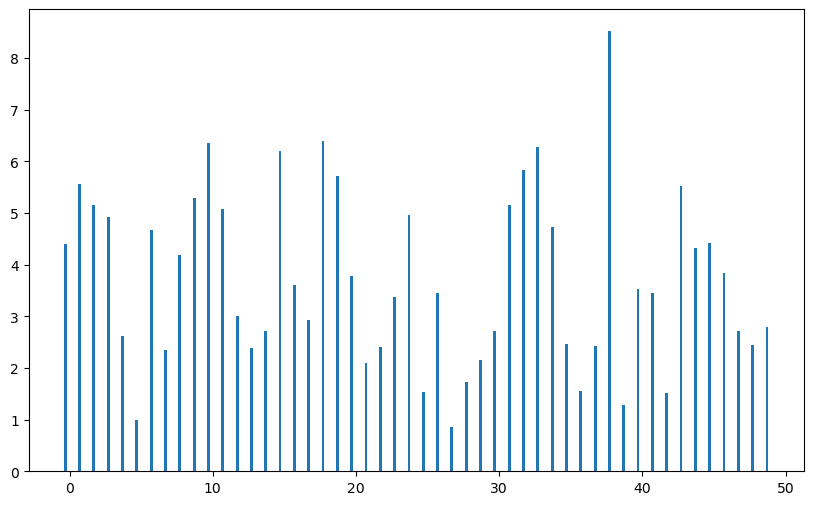

In [8]:
plot_ipc(ipc_results)